#### Project: EDI 
###### Anthony Wilson
DSC 630-T301

Introduction: The project will focus on stroke data. I am looking at lifestyle factors that potentially factor into people having strokes. <br><br>
Dataset: "healthcare-dataset-stroke-data.csv"<br>
Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv<br>
Information: The data was posted to help identify someone's odds from the data set having a stroke based on their demographic information and comorbidities. <br>

Column:defintion<br>
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>
<b> The column definitions are pulled directly from the website. <b>

In [1]:
# Here we are importing generic libraries to load into a data frame and gain a high-level understanding of the data 
import numpy as np
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#######################################################################################################
# Pulling in all column names and looping through each column to evaluate. We are looking for the total 
# number of unique values, nulls, and display the unique lists when there are less than or equal to 5 
# values and their counts.
#######################################################################################################
columns = df.columns
for c in columns:
    # initiate variables
    u_count = 0                                            #unique values
    null_count =0                                          #null counts
    u_list = []                                            #list of unique values
    # update values for each
    u_list = df[c].unique()
    u_count = len(u_list)
    null_count = df[c].isnull().sum()
    if u_count <= 5:
        print('{}: {} unique; {} null values'.format(c,u_count, null_count))
        print(df[c].value_counts())
        print('\n')
    else: 
        print('{}: {} unique; {} null values\n'.format(c,u_count, null_count))

id: 5110 unique; 0 null values

gender: 3 unique; 0 null values
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


age: 104 unique; 0 null values

hypertension: 2 unique; 0 null values
0    4612
1     498
Name: hypertension, dtype: int64


heart_disease: 2 unique; 0 null values
0    4834
1     276
Name: heart_disease, dtype: int64


ever_married: 2 unique; 0 null values
Yes    3353
No     1757
Name: ever_married, dtype: int64


work_type: 5 unique; 0 null values
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Residence_type: 2 unique; 0 null values
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


avg_glucose_level: 3979 unique; 0 null values

bmi: 419 unique; 201 null values

smoking_status: 4 unique; 0 null values
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


stroke: 2

The data looks clean, based on the summary above. Two things that stick out: 
1.	There is only one gender labeled as “other” I will remove this value from the data set since there is not enough to contribute. 
2.	BMI has 201 null values; currently, I am not too worried about this. For now, I will update them to be the average instead of having null values. 


In [3]:
# Before I make any changes to the data, let's look at the descriptive stats first. 
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The participants' average age is 43, the 75 percentile is 61, with the max at 82. The age range seems like a younger group, who may not be at risk for having a stroke.  Nine percent of the participants have hypertension, and Five percent have heart disease. The BMI is at 28.89, which is slightly over the recommended 18.5 to 24.9.

In [4]:
bins = [0, 18, 30, 40, 50, 60, 65, 90]
labels = ['0-18', '18-29', '30-39', '40-49', '50-59', '60-65', '65+']
df['age_group'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

In [5]:
grouping = df[df.stroke == 1].age_group.value_counts().to_frame()
grouping['percent'] = (df[df.stroke == 1].age_group.value_counts(normalize = True).to_frame() *100)
grouping

,age_group,percent
65+,156,62.650602
50-59,49,19.678715
60-65,21,8.433735
40-49,15,6.024096
30-39,6,2.409639
0-18,2,0.803213
18-29,0,0.000000


In [6]:
(df[df.stroke == 1].age_group.value_counts().to_frame())

,age_group
65+,156
50-59,49
60-65,21
40-49,15
30-39,6
0-18,2
18-29,0


In [7]:
df.groupby('age_group')['stroke'].value_counts().to_frame()

stroke
age_group stroke        
0-18      0          914
          1            2
18-29     0          654
30-39     0          668
          1            6
40-49     0          724
          1           15
50-59     0          774
          1           49
60-65     0          318
          1           21
65+       0          809
          1          156

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
def with_percents(ax,data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/ 2
        ax.annotate(percentage, (x, y))
    plt.show()
    
def with_counts(ax,data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/ 2
        ax.annotate(percentage, (x, y))
    plt.show()

def with_both(ax,data):
    total = len(data)
    for p in ax.patches:
        percentage = '{:.0f} - {:.1f}%'.format(p.get_width(), 100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/ 2
        ax.annotate(percentage, (x, y))
    plt.show()

In [9]:
colors  = ["#3F3F3F","#ED7D31"]
customPalette = sns.set_palette(sns.color_palette(colors))

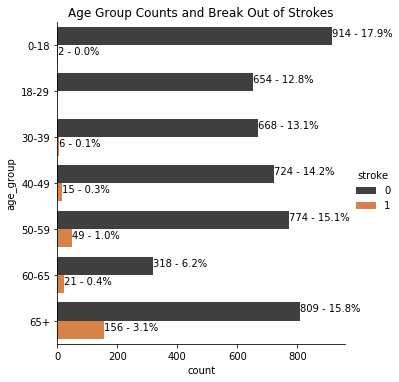

In [10]:
ax  = sns.catplot(y="age_group", hue="stroke", kind="count",data=df, color = customPalette).set(title = "Age Group Counts and Break Out of Strokes")
with_both(ax.ax, df)

In [11]:
bins = [0, 18.5, 21.0, 23.5, 25.0, 26.5, 28, 30, 98]
labels = ['0-18.4','18.5–20.9', '21.0–23.4','23.5–24.9', '25.0–26.4', '26.5–27.9','28.0–29.9', '30.0+']
df['bmi_grouping'] = pd.cut(df.bmi,bins, labels = labels,include_lowest = True)

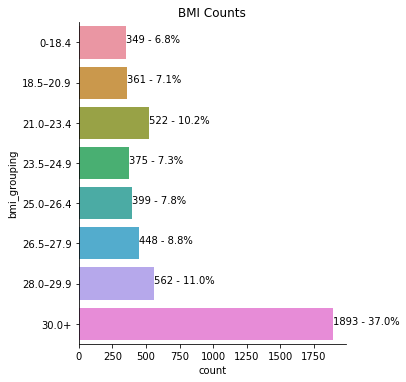

In [12]:
ax  = sns.catplot(y="bmi_grouping", kind="count",data=df).set(title = "BMI Counts")
with_both(ax.ax, df)

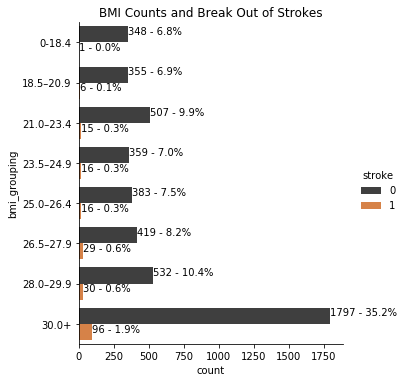

In [13]:
ax  = sns.catplot(y="bmi_grouping", hue="stroke", kind="count",data=df, color = customPalette).set(title = "BMI Counts and Break Out of Strokes")
with_both(ax.ax, df)

In [14]:
bins = [55, 70, 181, 250, 272]
labels = ['55–69', '70–180','181–249', '250+']
df['glucose_grouping'] = pd.cut(df.avg_glucose_level,bins, labels = labels,include_lowest = True)

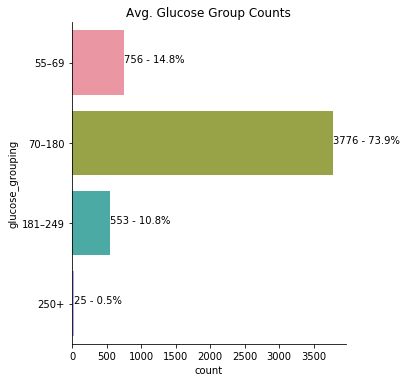

In [15]:
ax  = sns.catplot(y="glucose_grouping", kind="count",data=df).set(title = "Avg. Glucose Group Counts")
with_both(ax.ax, df)

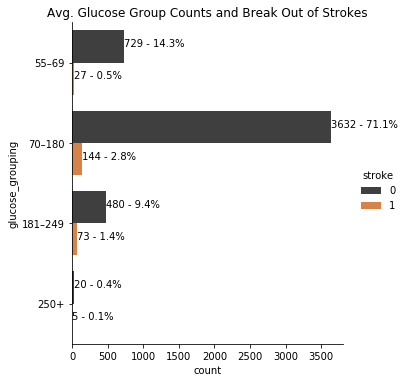

In [16]:
ax  = sns.catplot(y="glucose_grouping", hue="stroke", kind="count",data=df).set(
    title = "Avg. Glucose Group Counts and Break Out of Strokes")
with_both(ax.ax, df)

In [17]:
df.groupby('glucose_grouping').stroke.value_counts(normalize = True).to_frame()

stroke
glucose_grouping stroke          
55–69            0       0.964286
                 1       0.035714
70–180           0       0.961864
                 1       0.038136
181–249          0       0.867993
                 1       0.132007
250+             0       0.800000
                 1       0.200000

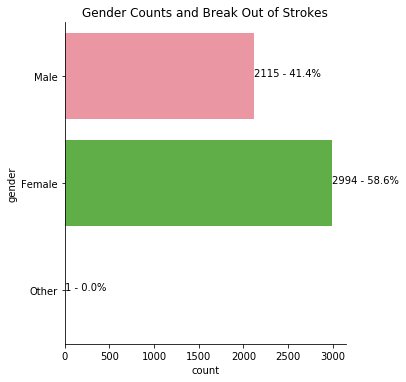

In [18]:
ax  = sns.catplot(y="gender", kind="count",data=df).set(title = "Gender Counts and Break Out of Strokes")
with_both(ax.ax, df)

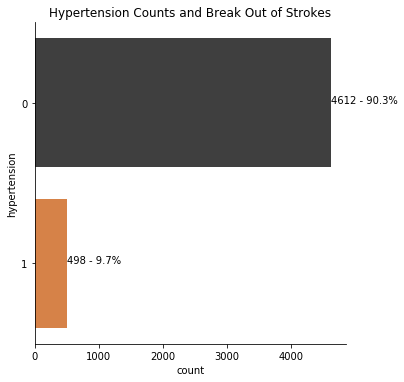

In [19]:
ax  = sns.catplot(y="hypertension",  kind="count",data=df).set(title = "Hypertension Counts and Break Out of Strokes")
with_both(ax.ax, df)

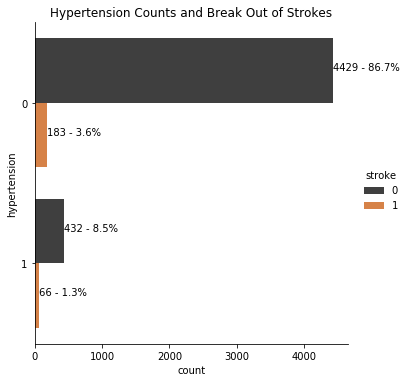

In [20]:
ax  = sns.catplot(y="hypertension", hue="stroke", kind="count",data=df).set(title = "Hypertension Counts and Break Out of Strokes")
with_both(ax.ax, df)

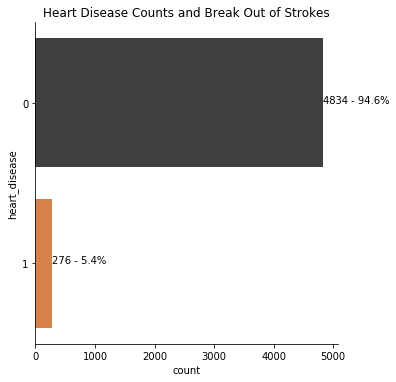

In [21]:
ax  = sns.catplot(y="heart_disease",  kind="count",data=df).set(title = "Heart Disease Counts and Break Out of Strokes")
with_both(ax.ax, df)

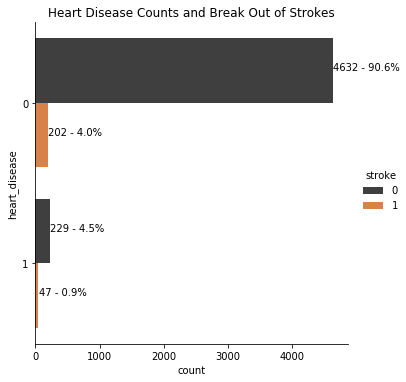

In [22]:
ax  = sns.catplot(y="heart_disease", hue="stroke", kind="count",data=df).set(title = "Heart Disease Counts and Break Out of Strokes")
with_both(ax.ax, df)

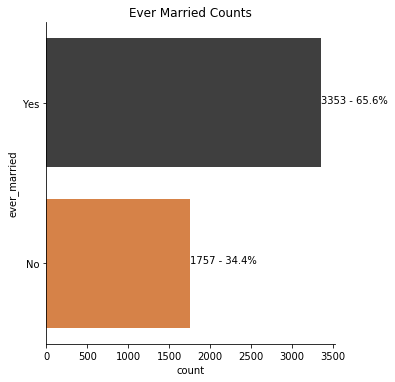

In [23]:
ax  = sns.catplot(y="ever_married",  kind="count",data=df).set(title = "Ever Married Counts")
with_both(ax.ax, df)

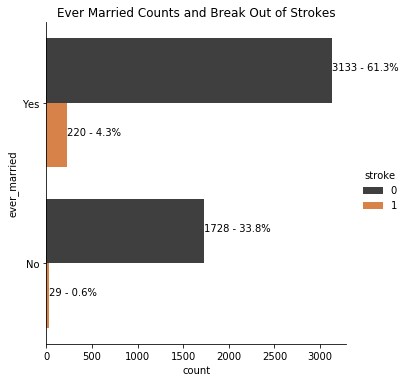

In [24]:
ax  = sns.catplot(y="ever_married", hue="stroke", kind="count",data=df).set(title = "Ever Married Counts and Break Out of Strokes")
with_both(ax.ax, df)

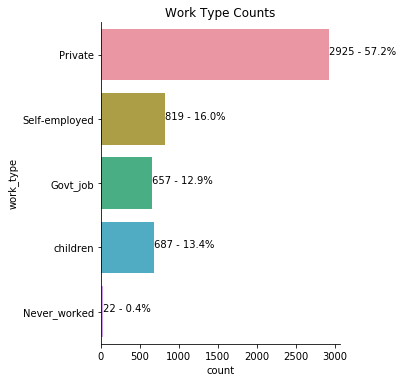

In [25]:
ax  = sns.catplot(y="work_type",  kind="count",data=df).set(title = "Work Type Counts")
with_both(ax.ax, df)

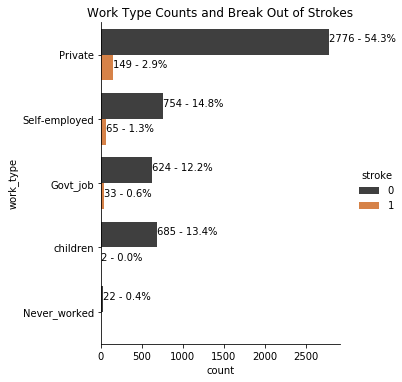

In [26]:
ax  = sns.catplot(y="work_type", hue="stroke", kind="count",data=df).set(title = "Work Type Counts and Break Out of Strokes")
with_both(ax.ax, df)

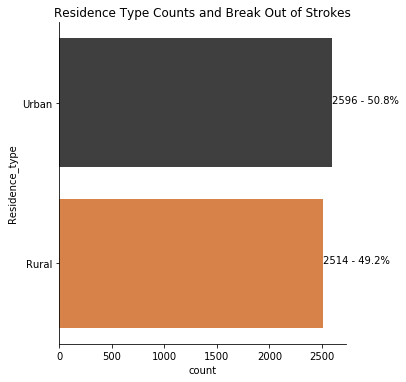

In [27]:
ax  = sns.catplot(y="Residence_type", kind="count",data=df).set(title = "Residence Type Counts and Break Out of Strokes")
with_both(ax.ax, df)

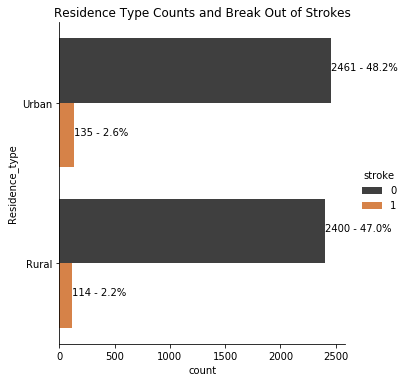

In [28]:
ax  = sns.catplot(y="Residence_type", hue="stroke", kind="count",data=df).set(title = "Residence Type Counts and Break Out of Strokes")
with_both(ax.ax, df)

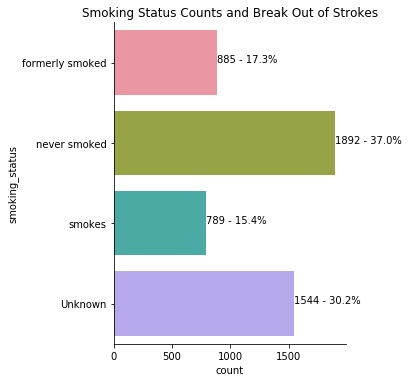

In [29]:
ax  = sns.catplot(y="smoking_status",  kind="count",data=df).set(title = "Smoking Status Counts and Break Out of Strokes")
with_both(ax.ax, df)

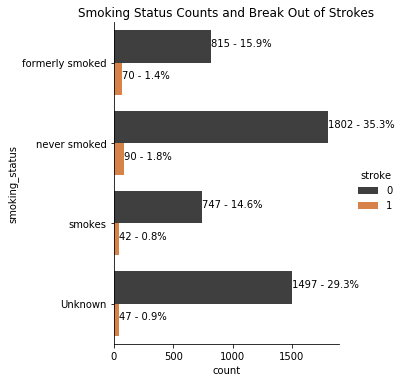

In [30]:
ax  = sns.catplot(y="smoking_status", hue="stroke", kind="count",data=df).set(title = "Smoking Status Counts and Break Out of Strokes")
with_both(ax.ax, df)

In [31]:
# update the null BMI values to the average
df_archive_1 = df
df = df.fillna(df.mean())
df = df[df['gender'] != 'other']
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Feature Engineering
Here the variables are going to get cleaned up and ready for the model. We want to try and limit the number of variables that we have, but also have the data available for training the model. After we have create features we will start digging deeper into the data for Feature Selection. 

In [32]:
df_archive_2 = df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_grouping,glucose_grouping
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,65+,30.0+,181–249
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,60-65,NaN,181–249
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,65+,30.0+,70–180
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,40-49,30.0+,70–180
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,65+,23.5–24.9,70–180


In [33]:
# We are using pandas get_dummies to prep the data so we only have numbers and no strings for categorical variables
df = pd.get_dummies(df)

In [34]:
# remove spaces and add '_' so the data is easier to work with
df = df.rename(columns = lambda x: str(x).lower().replace(' ', '_'))

We are removing gender_male, ever_married_no, work_type_never_worked, residence_type_urban, and smoking_status_uknown. Each of these variables if we don't have them we can identify them through variables that are similar. For example, gender_male, if gender_female = 0 then the patient must be a male, since we got rid of the one 'other'.

In [35]:
# define which columns that we want to use in our data set
col = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_female', 'ever_married_yes', 'work_type_govt_job', 'work_type_private'
         , 'work_type_self-employed', 'work_type_children','work_type_never_worked','residence_type_rural',
       'smoking_status_unknown','smoking_status_formerly_smoked','smoking_status_never_smoked', 
       'smoking_status_smokes', 'stroke']
df = df[col]

In [36]:
# trim some of the column names, by removing _type and smoking_status
df.rename(columns = lambda x: str(x).replace('_type', ''), inplace = True)
df.rename(columns = lambda x: str(x).replace('smoking_status_', ''), inplace = True)
# simplfy some general names
df.rename(columns = {'gender_female':'female', 
                     'ever_married_yes': 'ever_married',
                     'work_never_worked': 'never_worked',
                     'unknown': 'smoking_status_unknown'}, inplace = True)
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'female', 'ever_married', 'work_govt_job', 'work_private',
       'work_self-employed', 'work_children', 'never_worked',
       'residence_rural', 'smoking_status_unknown', 'formerly_smoked',
       'never_smoked', 'smokes', 'stroke'],
      dtype='object')

In [37]:
# archive the data and move forward with df
df_archive_3 = df
df.set_index( 'id', inplace = True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,female,ever_married,work_govt_job,work_private,work_self-employed,work_children,never_worked,residence_rural,smoking_status_unknown,formerly_smoked,never_smoked,smokes,stroke
id,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.600000,0,1,0,1,0,0,0,0,0,1,0,0,1
51676,61.0,0,0,202.21,28.893237,1,1,0,0,1,0,0,1,0,0,1,0,1
31112,80.0,0,1,105.92,32.500000,0,1,0,1,0,0,0,1,0,0,1,0,1
60182,49.0,0,0,171.23,34.400000,1,1,0,1,0,0,0,0,0,0,0,1,1
1665,79.0,1,0,174.12,24.000000,1,1,0,0,1,0,0,1,0,0,1,0,1


### Feature Selection
We are going to dig in a bit deeper into the data. I would like to see the relationship between the variables and find the most influential columns in the data. 

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
# splitting up the independent and dependent variables
X = df.iloc[:,0:17]
y = df.iloc[:,-1]

In [40]:
# looking at the chi scores with selectKBest to determine the top 10 features
features = SelectKBest(score_func = chi2, k=10)
fit = features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)
feature_score = pd.concat([dfcol,dfscores], axis = 1)
feature_score.columns =['specs', 'score'] 

In [41]:
(feature_score.set_index('specs').nlargest(10,'score'))

,score
specs,
age,3635.226911
avg_glucose_level,1718.285446
heart_disease,87.987436
hypertension,75.449498
work_children,31.111620
ever_married,20.622787
formerly_smoked,17.607359
work_self-employed,16.584252
bmi,15.894122


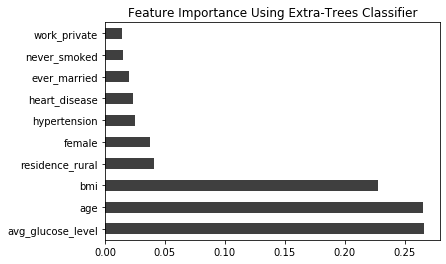

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns, name = 'feat_importance')
feat_importances.nlargest(10).plot(kind='barh', title = 'Feature Importance Using Extra-Trees Classifier')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data))]
vif_data

In [ ]:
df2 = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'female', 'ever_married', 'work_govt_job', 'work_private',
       'work_self-employed', 'work_children',  'residence_rural'
          , 'formerly_smoked','never_smoked', 'smokes', 'stroke']]
df2.loc[np.all(df2[['formerly_smoked', 'never_smoked', 'smokes']] == 0.0, axis = 1), 
       ['formerly_smoked', 'never_smoked', 'smokes']] = -1.
df2.loc[np.all(df2[['work_govt_job','work_private', 'work_self-employed', 'work_children']] == 0.0, axis = 1), 
       ['work_govt_job','work_private', 'work_self-employed', 'work_children']] = -1.

In [45]:
X = df2.iloc[:,0:15]
y = df2.iloc[:,-1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data))]
vif_data

,feature,VIF
0,age,12.215406
1,hypertension,1.219333
2,heart_disease,1.174820
3,avg_glucose_level,6.707521
4,bmi,12.112997
5,female,2.368533
6,ever_married,5.772832
7,work_govt_job,2.059630
8,work_private,6.102936
9,work_self-employed,2.608589


In [46]:
df_archive_4 = df2

In [ ]:
df2['age_bmi'] = df.apply(lambda x: x['age'] - x['bmi'],axis=1)
df2 = df2[["hypertension","heart_disease","avg_glucose_level","female","ever_married","work_govt_job",
           "work_private","work_self-employed","work_children","residence_rural","formerly_smoked",
           "never_smoked","smokes","age_bmi","stroke"]]
X = df2.iloc[:,0:14]
y = df2.iloc[:,-1]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(vif_data))]
vif_data

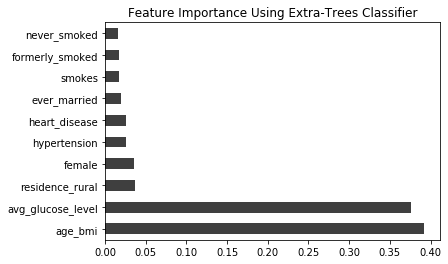

In [48]:
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns, name = 'feat_importance')
feat_importances.nlargest(10).plot(kind='barh', title = 'Feature Importance Using Extra-Trees Classifier')
plt.show()

In [49]:
#df_archive_5 = df
df = df2[["age_bmi", "avg_glucose_level", "residence_rural", "female",
          "hypertension", "heart_disease", "ever_married", "never_smoked",
          "smokes", "formerly_smoked", "stroke"]]

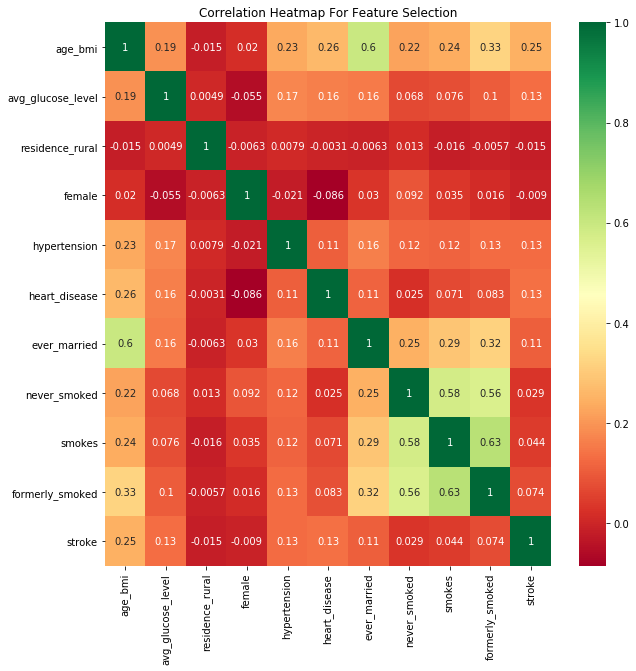

In [50]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set(
    title = "Correlation Heatmap For Feature Selection")

We can see that the data is sparse for those who have had a stroke. We will use Synthetic Minority Oversampling Technique (SMOTE) to oversample to data and address some of the imbalance. This process is used to help balance out the data. It essentially duplicates the imbalanced data. We are not adding data.  

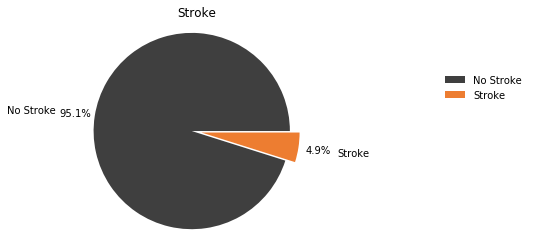

In [51]:
fig, ax = plt.subplots()

labels = ['No Stroke', 
         'Stroke']
percentages = (df.stroke.value_counts(normalize = True)*100).to_list()
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=customPalette, autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Stroke")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=20)

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train.ravel())

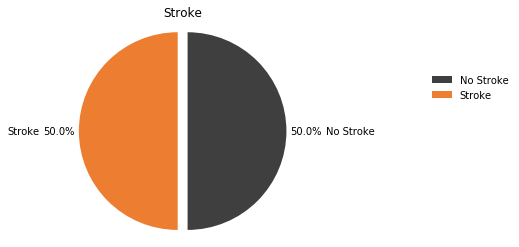

In [54]:
y_train_smo_df = pd.DataFrame(y_train_smo, columns = ['stroke'])
#Balance after using Smote
fig, ax = plt.subplots()

labels = ['No Stroke', 
         'Stroke']
percentages = (y_train_smo_df.stroke.value_counts(normalize = True)*100).to_list()
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=customPalette, autopct='%1.1f%%', 
       shadow=False, startangle=-90,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Stroke")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

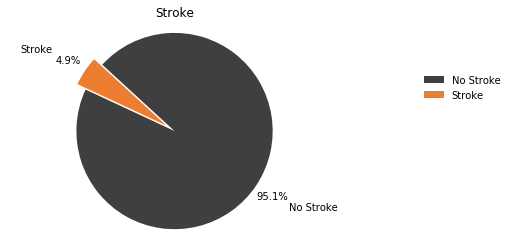

In [55]:
fig, ax = plt.subplots()

labels = ['No Stroke', 
         'Stroke']
percentages = (df.stroke.value_counts(normalize = True)*100).to_list()
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=customPalette, autopct='%1.1f%%', 
       shadow=False, startangle=155,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Stroke")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.14      0.15      0.15        75

    accuracy                           0.92      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.92      0.92      0.92      1533



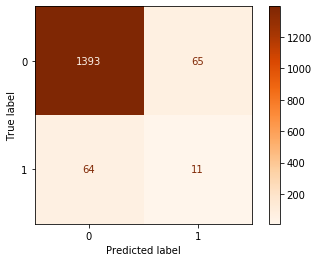

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

f_scores = {}

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train_smo,y_train_smo)

pred_test_desc_tree = decision_tree.predict(X_test)

f_scores['Decision_Tree'] = metrics.f1_score(y_test, pred_test_desc_tree)

print(metrics.classification_report(y_test, pred_test_desc_tree))
metrics.plot_confusion_matrix(decision_tree, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1458
           1       0.12      0.59      0.20        75

    accuracy                           0.77      1533
   macro avg       0.55      0.68      0.53      1533
weighted avg       0.93      0.77      0.83      1533



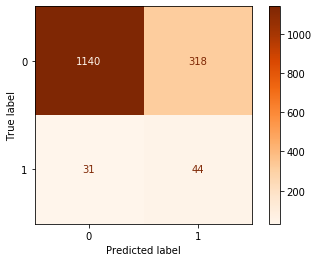

In [57]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(max_iter=2000)

log_regression.fit(X_train_smo,y_train_smo)

pred_test_log= log_regression.predict(X_test)

f_scores['Logistic_Regression'] = metrics.f1_score(y_test, pred_test_log)

print(metrics.classification_report(y_test, pred_test_log))
metrics.plot_confusion_matrix(log_regression, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1458
           1       0.12      0.80      0.21        75

    accuracy                           0.70      1533
   macro avg       0.55      0.75      0.51      1533
weighted avg       0.94      0.70      0.78      1533



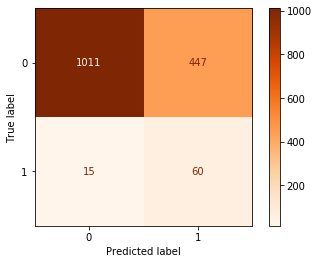

In [58]:
from sklearn import svm
_svm = svm.SVC()
_svm.fit(X_train_smo, y_train_smo)

_svm.fit(X_train_smo,y_train_smo)

pred_test_svm= _svm.predict(X_test)

f_scores['SVM'] = metrics.f1_score(y_test, pred_test_svm)

print(metrics.classification_report(y_test, pred_test_svm))
metrics.plot_confusion_matrix(_svm, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1458
           1       0.12      0.63      0.21        75

    accuracy                           0.76      1533
   macro avg       0.55      0.70      0.53      1533
weighted avg       0.93      0.76      0.83      1533



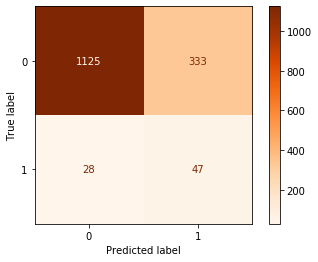

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lin_disc = LinearDiscriminantAnalysis(solver='svd')

lin_disc.fit(X_train_smo, y_train_smo)

pred_test_lin_disc = lin_disc.predict(X_test)

f_scores['Linear Discrim'] = metrics.f1_score(y_test, pred_test_lin_disc)

print(metrics.classification_report(y_test, pred_test_lin_disc))
metrics.plot_confusion_matrix(lin_disc, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.98      0.54      0.70      1458
           1       0.08      0.81      0.15        75

    accuracy                           0.56      1533
   macro avg       0.53      0.68      0.43      1533
weighted avg       0.94      0.56      0.67      1533



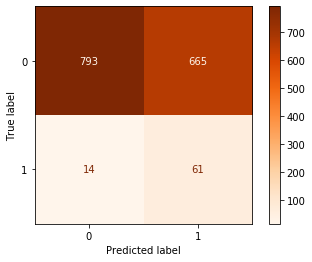

In [60]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train_smo, y_train_smo)

pred_test_naive = naive.predict(X_test)

f_scores['Naive_Bayes'] = metrics.f1_score(y_test, pred_test_naive)


print(metrics.classification_report(y_test, pred_test_naive))
metrics.plot_confusion_matrix(naive, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1458
           1       0.07      0.03      0.04        75

    accuracy                           0.93      1533
   macro avg       0.51      0.50      0.50      1533
weighted avg       0.91      0.93      0.92      1533



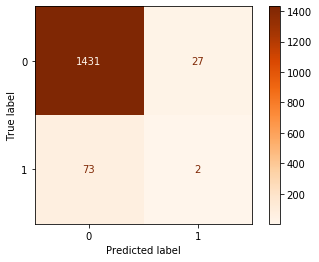

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(X_train_smo, y_train_smo)

pred_test_random_for = random_for.predict(X_test)

f_scores['Random_Forrest'] = metrics.f1_score(y_test, pred_test_random_for)

print(metrics.classification_report(y_test, pred_test_random_for))
metrics.plot_confusion_matrix(random_for, X_test, y_test, cmap = plt.cm.Oranges)

In [62]:
pd.DataFrame({'Model': list(f_scores.keys()), 'f1-score': list(f_scores.values())})

,Model,f1-score
0,Decision_Tree,0.145695
1,Logistic_Regression,0.201373
2,SVM,0.206186
3,Linear Discrim,0.206593
4,Naive_Bayes,0.152310
5,Random_Forrest,0.038462


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.20      0.17      0.18        75

    accuracy                           0.92      1533
   macro avg       0.58      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



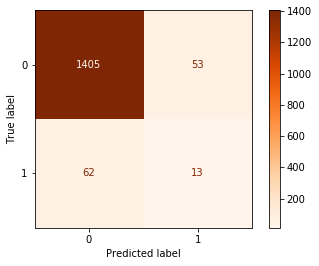

In [63]:
from sklearn.model_selection import GridSearchCV


parameters= {'max_depth':[7,10],
            'max_features':[4,5,6],
            'min_samples_split' : [90,100],
            'min_samples_leaf' : [20,30]}


DT = RandomForestClassifier()

DT_model_tune = GridSearchCV(DT, param_grid = parameters, cv=3)

DT_model_tune.fit(X_train_smo,y_train_smo)

predict_train_DT = DT_model_tune.predict(X_train_smo)
predict_test_DT = DT_model_tune.predict(X_test)

f_scores['Random Forrest - Grid'] = metrics.f1_score(y_test, predict_test_DT)

print(metrics.classification_report(y_test, predict_test_DT))
metrics.plot_confusion_matrix(DT_model_tune, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1458
           1       0.12      0.59      0.20        75

    accuracy                           0.77      1533
   macro avg       0.55      0.68      0.53      1533
weighted avg       0.93      0.77      0.83      1533



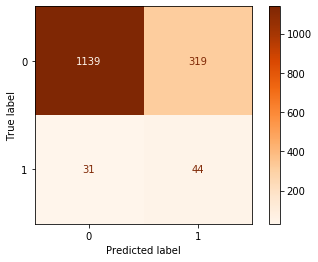

In [64]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(log_regression, param_grid, cv = 5)
  
logreg_cv.fit(X_train_smo,y_train_smo)
  
logreg_cv_pred = logreg_cv.predict(X_test)

f_scores['Logistic Regression - Grid'] = metrics.f1_score(y_test, logreg_cv_pred)

print(metrics.classification_report(y_test, logreg_cv_pred))
metrics.plot_confusion_matrix(logreg_cv, X_test, y_test, cmap = plt.cm.Oranges)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1458
           1       0.11      0.11      0.11        75

    accuracy                           0.91      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.91      0.91      0.91      1533



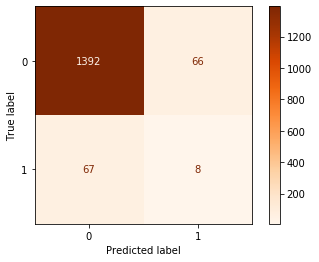

In [65]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(decision_tree, param_dist, cv = 5)
  
tree_cv.fit(X_train_smo,y_train_smo)
  
tree_cv_pred = tree_cv.predict(X_test)

f_scores['Deciscion Tree - RandSearch'] = metrics.f1_score(y_test, tree_cv_pred)

print(metrics.classification_report(y_test, tree_cv_pred))
metrics.plot_confusion_matrix(tree_cv, X_test, y_test, cmap = plt.cm.Oranges)

In [66]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid']} 
grid = GridSearchCV(_svm, param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_smo,y_train_smo)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV 1/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 2/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   1.1s
[CV 3/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   1.1s
[CV 4/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   1.1s
[CV 5/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   1.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.4s
[CV 2/5] END ...................C=0.1, gamma=0.

[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   3.1s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   3.3s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   3.2s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   3.2s
[CV 1/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 2/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 3/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 4/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 5/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 1/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 2/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 4/5] END ...............

[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.2s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.1s
[CV 1/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 2/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 3/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 4/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   0.9s
[CV 5/5] END ................C=1000, gamma=1, kernel=sigmoid; total time=   1.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.4s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 1/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1458
           1       0.08      0.13      0.10        75

    accuracy                           0.88      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.91      0.88      0.90      1533



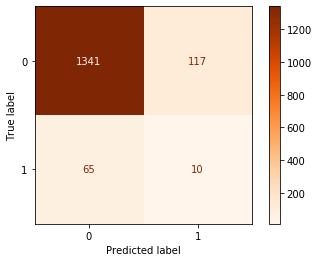

In [67]:
grid_pred = grid.predict(X_test)

f_scores['SVM - Grid'] = metrics.f1_score(y_test, grid_pred)

print(metrics.classification_report(y_test, grid_pred))
metrics.plot_confusion_matrix(grid, X_test, y_test, cmap = plt.cm.Oranges)

In [68]:
pd.DataFrame({'Model': list(f_scores.keys()), 'f1-score': list(f_scores.values())})

,Model,f1-score
0,Decision_Tree,0.145695
1,Logistic_Regression,0.201373
2,SVM,0.206186
3,Linear Discrim,0.206593
4,Naive_Bayes,0.152310
5,Random_Forrest,0.038462
6,Random Forrest - Grid,0.184397
7,Logistic Regression - Grid,0.200913
8,Deciscion Tree - RandSearch,0.107383
9,SVM - Grid,0.099010
